In [2]:
## Import Some Libraries
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
class LoadModel:
    def __init__(self, file_path):
        with open(file_path, 'r') as f:
            model_data = json.load(f)
        
        layers = model_data['layers']
        n_layers = len(layers)
        
        self.weights = []
        self.biases = []
        self.activations = []
        
        for i in range(1, n_layers):
            layer = layers[i]
            
            if layer['tipe'] == 'hidden':
                n_neurons = layer['n_neuron']
                weight = np.array(layer['weight'])
                bias = np.array(layer['bias'])
                activation = layer['activation_function']
                
                self.weights.append(weight)
                self.biases.append(bias)
                self.activations.append(activation)
                
            elif layer['tipe'] == 'output':
                n_neurons = layer['n_neuron']
                weight = np.array(layer['weight'])
                bias = np.array(layer['bias'])
                activation = layer['activation']
                
                self.weights.append(weight)
                self.biases.append(bias)
                self.activations.append(activation)
                
    def get_weights(self):
        return self.weights
    
    def get_biases(self):
        return self.biases
    
    def get_activations(self):
        return self.activations
    
    def get_layer(self, layer):
        return self.weights[layer], self.biases[layer], self.activations[layer]
    
    def get_layer_weights(self, layer):
        return self.weights[layer]
    
    def get_layer_biases(self, layer):
        return self.biases[layer]
    
    def get_layer_activations(self, layer):
        return self.activations[layer]
    
    def get_model(self):
        return self.weights, self.biases, self.activations
    
    # print model per layer
    def print_model(self):
        for i in range(len(self.weights)):
            print('Layer', i+1)
            print('Weights:', self.weights[i])
            print('Biases:', self.biases[i])
            print('Activations:', self.activations[i])
            print('')

y_pred: 
 [[0.]
 [1.]
 [1.]
 [0.]]


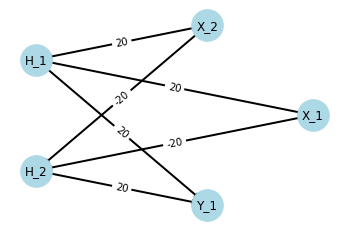

Predictions: 
 [[4.54391049e-05]
 [9.99954520e-01]
 [9.99954520e-01]
 [4.54391049e-05]]
Accuracy: 0.00%


In [4]:
class FFNN:
    def __init__(self, model_path):
        self.model = LoadModel(model_path)
        self.weights = self.model.get_weights()
        self.biases = self.model.get_biases()
        self.activations = self.model.get_activations()

    def forward_propagation(self, X):
        input_layer = X
        n_layers = len(self.weights) + 1
        for i in range(n_layers - 1):
            dot_product = np.dot(input_layer, self.weights[i]) + self.biases[i]
            if self.activations[i] == 'relu':
                output_layer = np.maximum(0, dot_product)
            elif self.activations[i] == 'sigmoid':
                output_layer = 1 / (1 + np.exp(-dot_product))
            elif self.activations[i] == 'linear':
                output_layer = dot_product
            elif self.activations[i] == 'softmax':
                output_layer = np.exp(dot_product) / np.sum(np.exp(dot_product), axis=0)
            input_layer = output_layer

        return output_layer

    def predict(self, X):
        if len(X.shape) == 1:
            return self.forward_propagation(X)
        else:
            predictions = []
            for instance in X:
                predictions.append(self.forward_propagation(instance))
            return np.array(predictions)
        
    def acurracy(self, X, y_true):
        y_pred = self.predict(X)
        for i in range(len(y_pred)):
            if y_pred[i] >= 0.5:
                y_pred[i] = 1
            else:
                y_pred[i] = 0
                
        print("y_pred: \n", y_pred)
                
        n_correct = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_true[i]:
                n_correct += 1
        
        return n_correct / len(y_pred)
        
    def print_model(self):
        self.model.print_model()

    def draw_network(self):
        G = nx.DiGraph()

        # add nodes
        input_nodes = [f'X_{i + 1}' for i in range(len(self.weights[0]))]
        G.add_nodes_from(input_nodes, layer='Input')

        hidden_nodes = [f'H_{i + 1}' for i in range(len(self.weights[0][0]))]
        G.add_nodes_from(hidden_nodes, layer='Hidden')

        output_nodes = [f'Y_{i + 1}' for i in range(len(self.weights[-1][0]))]
        G.add_nodes_from(output_nodes, layer='Output')

        for i in range(len(self.weights) - 1):
            for j in range(len(self.weights[i])):
                for k in range(len(self.weights[i][j])):
                    G.add_edge(input_nodes[j], hidden_nodes[k], weight=self.weights[i][j][k])

        for i in range(len(self.weights[-1])):
            for j in range(len(self.weights[-1][0])):
                G.add_edge(hidden_nodes[i], output_nodes[j], weight=self.weights[-1][i][j])

        # draw network
        pos = nx.circular_layout(G)
        nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')
        nx.draw_networkx_edges(G, pos, width=2, edge_color='black')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
        nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
        plt.axis('off')
        plt.show()


# main function
def main():
    # load model
    # filename = input("Enter the filename: ")
    filename = 'sigmoid'
    model_path = filename + '.json'
    model = FFNN(model_path)

    # visualize input layer
    X = np.array([[0,0], [0,1], [1,0], [1,1]])

    # predict output
    y_pred = model.predict(X)

    # calculate accuracy
    y_true = np.array([1, 0, 0, 1])
    accuracy = model.acurracy(X, y_true)

    model.draw_network()

    # print predictions and accuracy
    print('Predictions: \n', y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy*100))

if __name__ == '__main__':
    main()
